<a href="https://colab.research.google.com/github/aasimmalikin/Credit-Card-Fraud-Detection-with-Logistic-Regression-Neural-Networks-XGBoost./blob/main/Credit_Card_Fraud_Detection_with_Logistic_Regression_%2B_Neural_Networks_%2B_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection with Logistic Regression + Neural Networks + XGBoost **

**Logistic Regression applies the Sigmoid function to transform linear combinations of features into probabilities.**

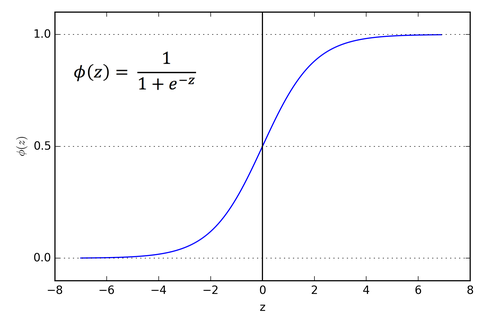

**SETUP**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('creditcard.csv')

**Data Exploration**

In [4]:
df.shape

(138723, 31)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138723 entries, 0 to 138722
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    138723 non-null  int64  
 1   V1      138723 non-null  float64
 2   V2      138723 non-null  float64
 3   V3      138723 non-null  float64
 4   V4      138723 non-null  float64
 5   V5      138723 non-null  float64
 6   V6      138723 non-null  float64
 7   V7      138723 non-null  float64
 8   V8      138723 non-null  float64
 9   V9      138723 non-null  float64
 10  V10     138723 non-null  float64
 11  V11     138723 non-null  float64
 12  V12     138723 non-null  float64
 13  V13     138723 non-null  float64
 14  V14     138722 non-null  float64
 15  V15     138722 non-null  float64
 16  V16     138722 non-null  float64
 17  V17     138722 non-null  float64
 18  V18     138722 non-null  float64
 19  V19     138722 non-null  float64
 20  V20     138722 non-null  float64
 21  V21     13

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,138723.000000,138723.000000,138723.000000,138723.000000,138723.000000,138723.000000,138723.000000,138723.000000,138723.000000,138723.000000,...,138722.000000,138722.000000,138722.000000,138722.000000,138722.000000,138722.000000,138722.000000,138722.000000,138722.000000,138722.000000
mean,51570.190084,-0.248170,0.015443,0.672712,0.140207,-0.283917,0.077891,-0.117186,0.064605,-0.091584,...,-0.039217,-0.118312,-0.033515,0.011713,0.130370,0.023531,0.000797,0.002247,91.372145,0.001903
std,20745.473470,1.817587,1.615534,1.270115,1.322913,1.308765,1.283315,1.167239,1.224771,1.089741,...,0.720410,0.635551,0.593318,0.595564,0.437379,0.492150,0.389014,0.307943,247.814657,0.043583
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,37779.500000,-1.020370,-0.565842,0.170374,-0.714873,-0.905087,-0.662340,-0.604288,-0.131395,-0.715084,...,-0.226164,-0.547786,-0.171759,-0.324877,-0.135888,-0.326186,-0.060320,-0.004175,6.020000,0.000000
50%,53385.000000,-0.266652,0.102463,0.750024,0.167477,-0.315723,-0.176836,-0.064724,0.080078,-0.154161,...,-0.059658,-0.095340,-0.044952,0.068621,0.167033,-0.065571,0.011733,0.023576,23.990000,0.000000
75%,68890.000000,1.158087,0.773875,1.363266,0.994663,0.236965,0.464264,0.409523,0.373975,0.483945,...,0.113776,0.301698,0.083242,0.408483,0.418989,0.287333,0.086741,0.076983,81.190000,0.000000
max,82811.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [8]:
null_counts = df.isnull().sum()
not_null_counts = df.notnull().sum()
comparison = pd.DataFrame({
    "Null": null_counts,
    "Not Null": not_null_counts
})

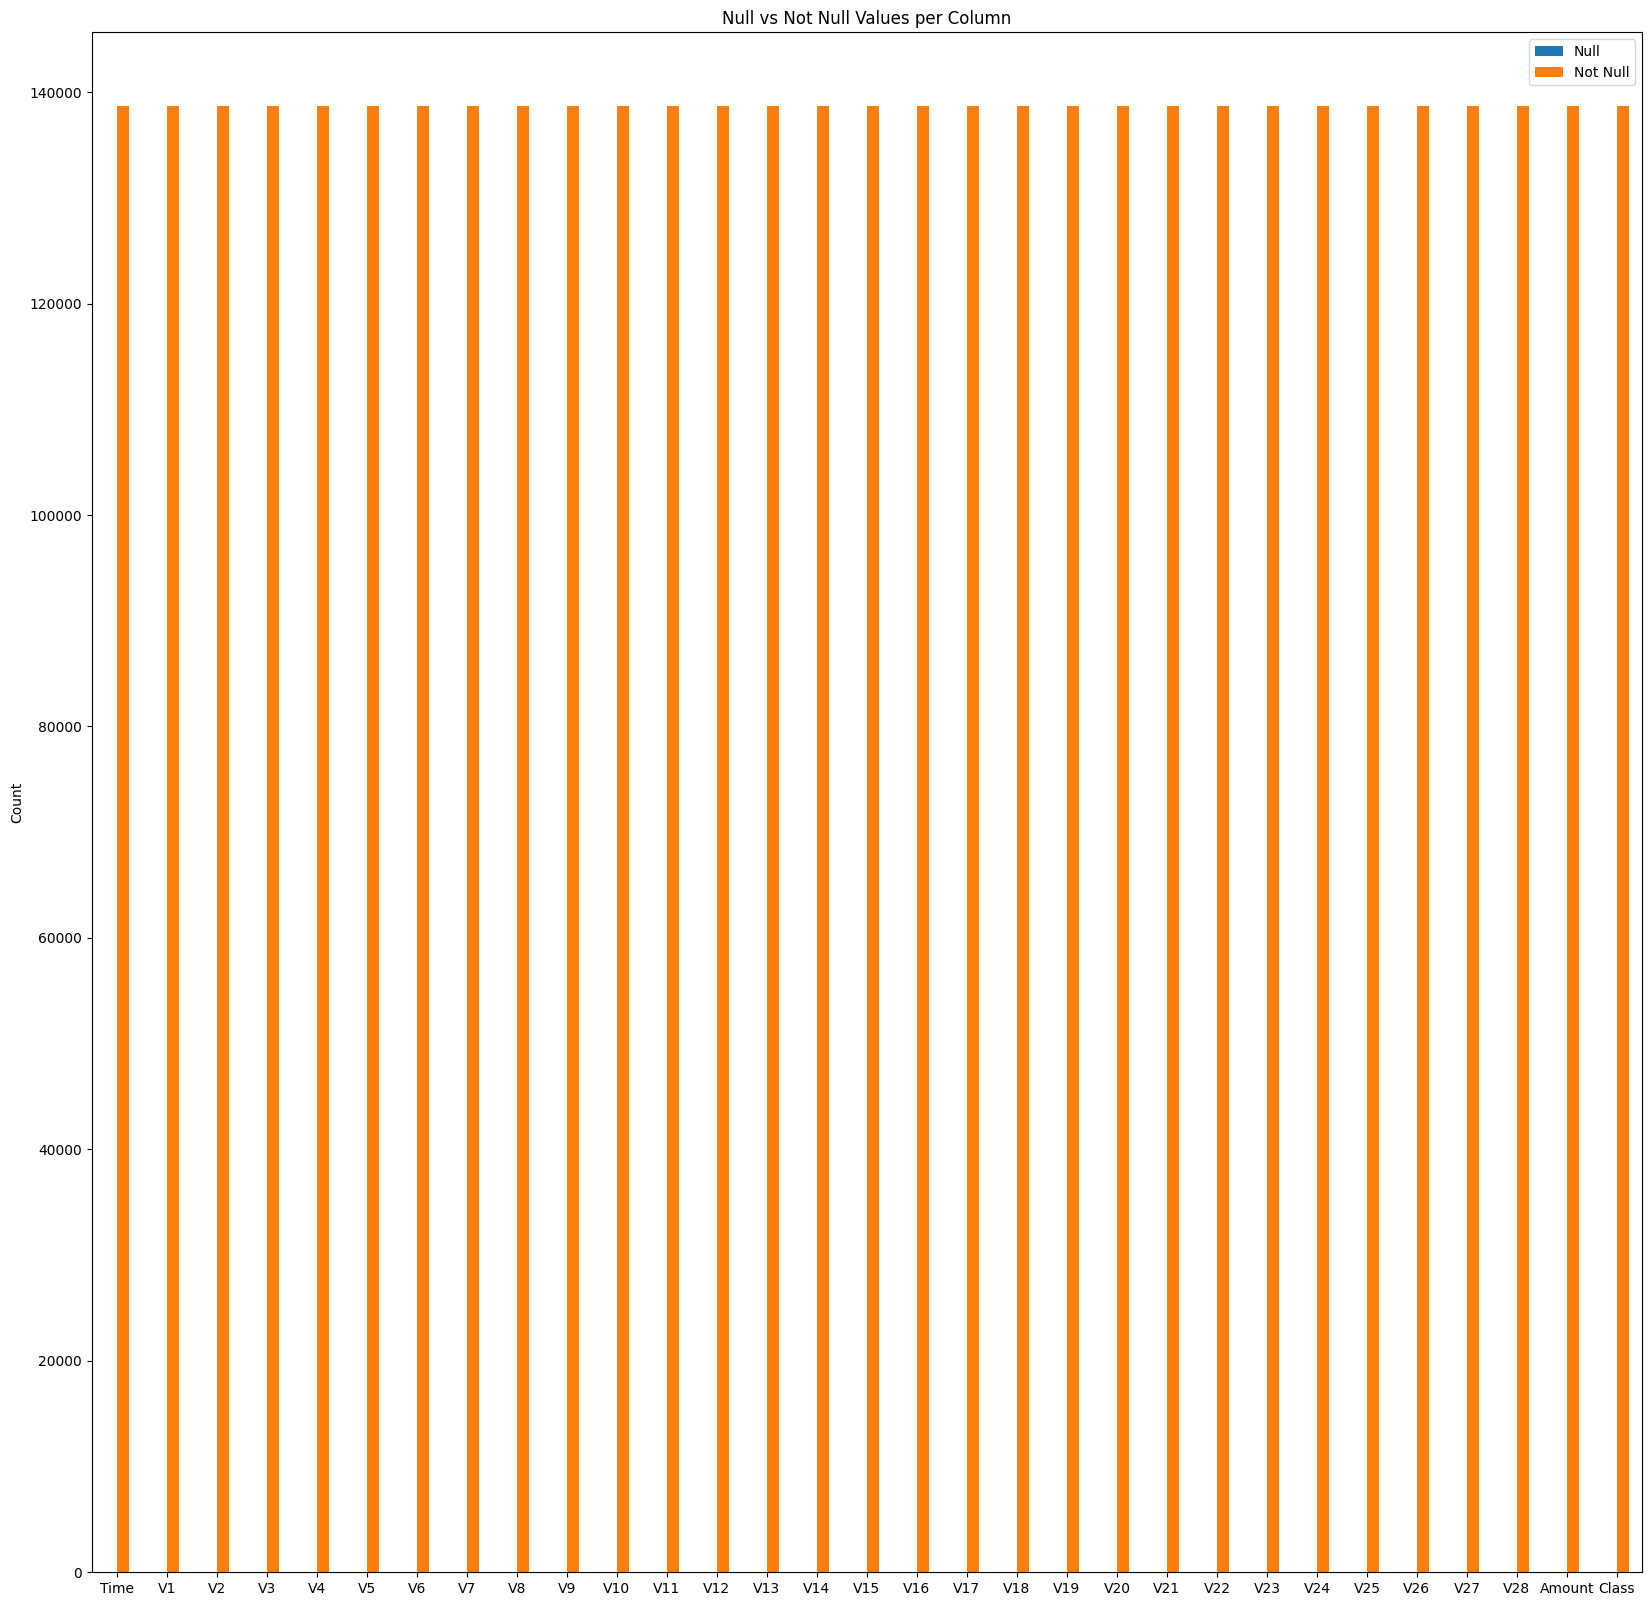

In [9]:
comparison.plot(kind="bar", figsize=(20,20))
plt.title("Null vs Not Null Values per Column")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

**Data's Nature (Balanced/ Imbalanced)**

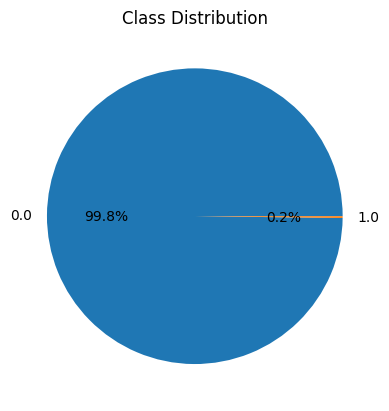

In [10]:
df['Class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Class Distribution")
plt.ylabel("")
plt.show()

Take a look at this visualization — the minority class (fraudulent cases) makes up just 0.2% of the data, while the majority class dominates at 99.8%.

**Why is this a problem?**

Machine Learning models tend to get biased towards the majority class.

Accuracy may look high, but the model fails to detect rare, yet critical, cases.

**Solution: SMOTE (Synthetic Minority Oversampling Technique)**

Instead of simply duplicating minority samples, SMOTE creates synthetic examples by interpolating between existing minority instances.

This helps the dataset become more balanced without losing valuable information.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
)
from imblearn.over_sampling import SMOTE

In [12]:
df_cleaned = df.dropna(subset=['Class'])
X = df_cleaned.drop("Class", axis=1)
y = df_cleaned["Class"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

**Applying SMOTE to the data frame**

In [13]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Class
0.0    110766
1.0       211
Name: count, dtype: int64
After SMOTE: Class
0.0    110766
1.0    110766
Name: count, dtype: int64


**StandardScaler()**

This is a preprocessing tool from scikit-learn.

It standardizes features by removing the mean and scaling to unit variance.

**scaler.fit_transform(X_train)**

This is a two-step process:

**fit()** → Calculates the mean and standard deviation of each feature in X_train.

It "learns" the scaling parameters only from the training data (important to prevent data leakage).

**transform()** → Applies the scaling to X_train using the learned mean and std.

Result → X_train_scaled is the standardized training dataset.


**scaler.transform(X_test)**

Here we only transform, not fit.

It applies the same scaling parameters (mean and std) that were learned from the training set to the test set.

Why? Because the model must be tested on data scaled in the same way as the training data.

This avoids "peeking" into the test data, ensuring a fair evaluation.

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [16]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [17]:
print("\n🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


🔹 Accuracy: 0.9987385114435033

🔹 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27692
         1.0       0.75      0.51      0.61        53

    accuracy                           1.00     27745
   macro avg       0.87      0.75      0.80     27745
weighted avg       1.00      1.00      1.00     27745



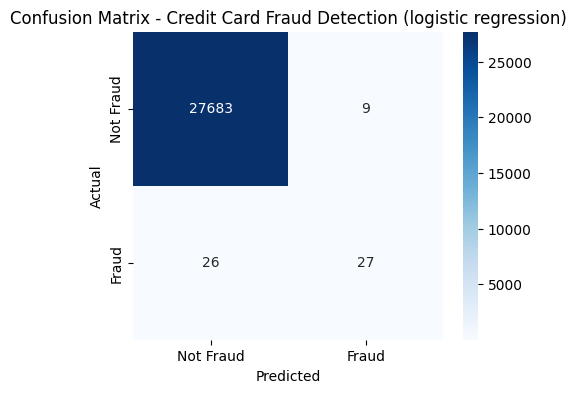

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Credit Card Fraud Detection (logistic regression)")
plt.show()

**Neural Network Model**

In [22]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [26]:
model = Sequential( [Dense(units=25, activation="relu"), Dense(units=15, activation="relu" ), Dense(units=1, activation="sigmoid")])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


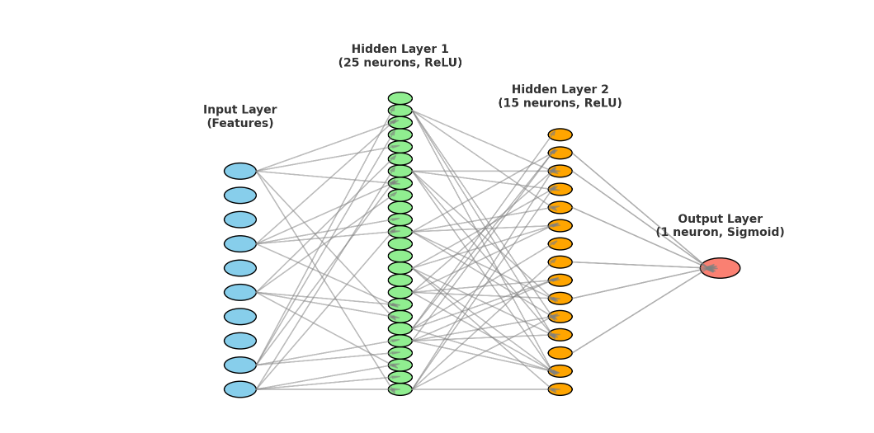

**Sequential([...])**

This defines a Sequential model in Keras (TensorFlow).

Sequential means the layers are stacked one after another in a linear fashion (each layer’s output is the next layer’s input).

Layers inside the model

**Dense(units=25, activation="relu")**

Dense = Fully connected layer (each neuron connects to all inputs).

units=25 → This layer has 25 neurons.

activation="relu" → ReLU (Rectified Linear Unit) activation is applied:

𝑓
(
𝑥
)
=
max
⁡
(
0
,
𝑥
)
f(x)=max(0,x)

ReLU introduces non-linearity, allowing the network to learn complex patterns.

**Dense(units=15, activation="relu")**

Second hidden layer with 15 neurons.

Again uses ReLU activation to learn deeper, more abstract representations.

Dense(units=1, activation="sigmoid")

**Output layer with 1 neuron.**

sigmoid activation squashes the output into a range between 0 and 1:

Perfect for binary classification (e.g., fraud vs. not fraud, spam vs. not spam).

In [28]:
model.fit(X_train_res, y_train_res, epochs=10, validation_split=0.2)

Epoch 1/10
5539/5539 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7463 - loss: 38.4033 - val_accuracy: 0.8764 - val_loss: 8.1965
Epoch 2/10
5539/5539 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8919 - loss: 8.0459 - val_accuracy: 0.7258 - val_loss: 57.0029
Epoch 3/10
5539/5539 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9158 - loss: 7.2068 - val_accuracy: 0.8394 - val_loss: 28.3450
Epoch 4/10
5539/5539 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9346 - loss: 5.1168 - val_accuracy: 0.8937 - val_loss: 11.4164
Epoch 5/10
5539/5539 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9355 - loss: 4.7495 - val_accuracy: 1.0000 - val_loss: 1.6452e-06
Epoch 6/10
5539/5539 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9394 - loss: 4.2653 - val_accuracy: 0.7677 - val_loss: 54.1200
Epoch 7/10
5539/5539 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9417 - loss: 4.2637 - val_accuracy: 0.9036 - val_loss: 8.3771
Epoch 8/10
5539/5539 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9474 

In [29]:
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

868/868 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [30]:
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred))


🔹 Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27692
         1.0       0.00      0.00      0.00        53

    accuracy                           1.00     27745
   macro avg       0.50      0.50      0.50     27745
weighted avg       1.00      1.00      1.00     27745



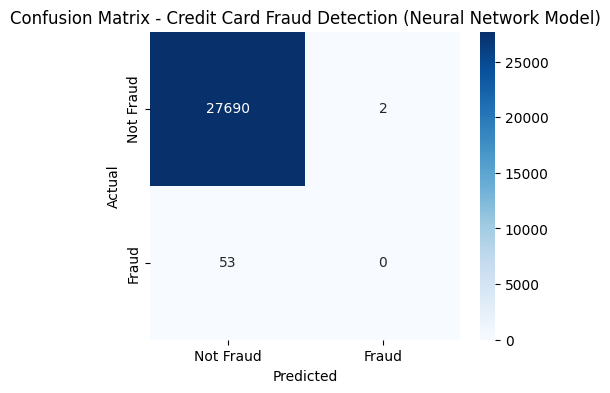

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Credit Card Fraud Detection (Neural Network Model)")
plt.show()

**XGBoost Model**

In [32]:
from xgboost import XGBClassifier

In [33]:
model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=1,  # already balanced using SMOTE
    use_label_encoder=False,
    eval_metric="logloss"
)

In [34]:
model.fit(X_train_res, y_train_res)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:45:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [35]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9996756172283294
ROC-AUC: 0.9980179549164803

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27692
         1.0       0.91      0.92      0.92        53

    accuracy                           1.00     27745
   macro avg       0.95      0.96      0.96     27745
weighted avg       1.00      1.00      1.00     27745



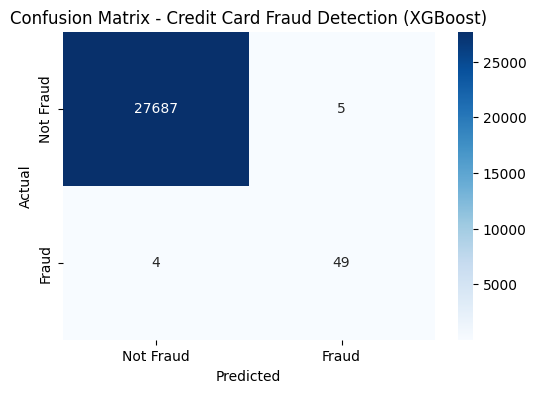

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Credit Card Fraud Detection (XGBoost)")
plt.show()